In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# classifier
from sklearn.linear_model import LogisticRegression


In [256]:
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)

In [257]:
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [258]:
print(f"class data : {df['class'].unique()}")
print(f"{df['class'].value_counts()}")
print(f"sample data : {df.shape[0]}, feature data : {df.shape[1]}")


class data : ['p' 'e']
class
e    4208
p    3916
Name: count, dtype: int64
sample data : 8124, feature data : 23


## Prepare Data

In [259]:
label_encoder = LabelEncoder()
df = df.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)

## Train test split

In [260]:
def custom_train_test_split(df, test_size, random_state=seed_value):
    train = df.sample(frac=(1 - test_size), random_state=random_state)
    test = df.drop(train.index)
    
    return train, test

## Algorithm Logistic Regression

In [262]:
class LogisticRegression_custom():
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.weights = None
        self.bias = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, Y):
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient Descent
        for iter in range(self.iterations):
            
            # Compute prediction
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            # Compute log loss
            loss = -np.mean(Y * np.log(y_predicted) + (1 - Y) * np.log(1 - y_predicted))
            self.loss.append(loss)
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - Y))
            db = (1 / n_samples) * np.sum(y_predicted - Y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
               
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)


class LogisticRegression_Radargard():
    def __init__(self, learning_rate=0.01, iterations=1000, beta=0.9, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.beta = beta
        self.epsilon = epsilon
        self.loss = []
        self.weights = None
        self.bias = None
        self.v_dw = None
        self.v_db = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, Y):
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.v_dw = np.zeros(n_features)
        self.v_db = 0
        
        # Gradient Descent
        for iter in range(self.iterations):
            
            # Compute prediction
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            # Compute log loss
            loss = -np.mean(Y * np.log(y_predicted) + (1 - Y) * np.log(1 - y_predicted))
            self.loss.append(loss) 
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - Y))
            db = (1 / n_samples) * np.sum(y_predicted - Y)
            
            # Radargrad update
            self.v_dw = self.beta * self.v_dw + (1 - self.beta) * (dw ** 2)
            self.v_db = self.beta * self.v_db + (1 - self.beta) * (db ** 2)
            
            # Update parameters with Radargrad
            self.weights -= (self.learning_rate / (np.sqrt(self.v_dw) + self.epsilon)) * dw
            self.bias -= (self.learning_rate / (np.sqrt(self.v_db) + self.epsilon)) * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)


## Set up data and training model

In [263]:
full_train, test = custom_train_test_split(df, test_size=0.2)
train, validation = custom_train_test_split(full_train, test_size=0.2)

x_train = train.drop(['class'], axis=True)
y_train = train['class']

x_vali = validation.drop(['class'], axis=True)
y_vali = validation['class']

x_test = test.drop(['class'], axis=True)
y_test = test['class']

      class  cap-shape  cap-surface  cap-color  bruises  odor  \
1971      0          2            0          4        0     5   
6654      1          2            2          2        0     8   
5606      1          5            3          4        0     2   
3332      0          2            3          3        1     5   
6988      1          2            2          2        0     7   
...     ...        ...          ...        ...      ...   ...   
7830      0          3            2          3        0     5   
5000      1          2            0          9        0     2   
5853      1          0            2          8        1     5   
1279      0          2            2          8        0     5   
7250      1          3            2          4        0     8   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
1971                1             1          0           3  ...   
6654                1             0          1           0  ...   
5606              

In [264]:
model_rogistic = LogisticRegression()
model_rogistic_custom = LogisticRegression_custom()
model_rogistic_Radargard = LogisticRegression_Radargard()

model_rogistic.fit(x_train, y_train)
model_rogistic_custom.fit(x_train, y_train)
model_rogistic_Radargard.fit(x_train, y_train)


y_pred_validation_rogistic = model_rogistic.predict(x_vali)
y_pred_validation_rogistic_custom = model_rogistic_custom.predict(x_vali)
y_pred_validation_rogistic_Radargard = model_rogistic_Radargard.predict(x_vali)

y_pred_rogistic = model_rogistic.predict(x_test)
y_pred_rogistic_custom = model_rogistic_custom.predict(x_test)
y_pred_rogistic_Radargard = model_rogistic_Radargard.predict(x_test)

c:\Users\maiwi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Performance

In [265]:
accuracy_validation_set_rogistic = np.mean(y_pred_validation_rogistic == y_vali)
accuracy_validation_set_rogistic_custom = np.mean(y_pred_validation_rogistic_custom == y_vali)
accuracy_validation_set_rogistic_Radargard = np.mean(y_pred_validation_rogistic_Radargard == y_vali)

print(f"Accuracy Validation Set LogisticRegression: {accuracy_validation_set_rogistic}")
print(f"Accuracy Validation Set LogisticRegression Custom: {accuracy_validation_set_rogistic_custom}")
print(f"Accuracy Validation Set LogisticRegression Radargard: {accuracy_validation_set_rogistic_Radargard}")

Accuracy Validation Set LogisticRegression: 0.9423076923076923
Accuracy Validation Set LogisticRegression Custom: 0.8853846153846154
Accuracy Validation Set LogisticRegression Radargard: 0.943076923076923


In [266]:
accuracy_rogistic = np.mean(y_pred_rogistic == y_test)
accuracy_rogistic_custom = np.mean(y_pred_rogistic_custom == y_test)
accuracy_rogistic_Radargard = np.mean(y_pred_rogistic_Radargard == y_test)

print(f"Accuracy LogisticRegression: {accuracy_rogistic}")
print(f"Accuracy LogisticRegression Custom: {accuracy_rogistic_custom}")
print(f"Accuracy LogisticRegression Radargard: {accuracy_rogistic_Radargard}")

Accuracy LogisticRegression: 0.9526153846153846
Accuracy LogisticRegression Custom: 0.8806153846153846
Accuracy LogisticRegression Radargard: 0.952


## Graph Loss over iterations

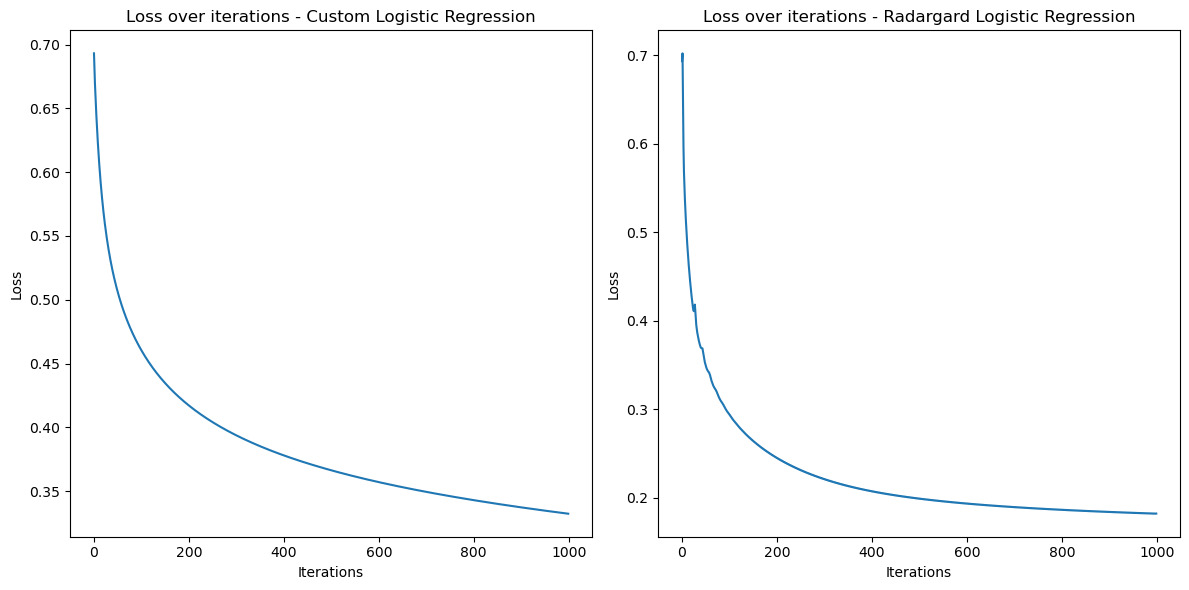

In [267]:
plt.figure(figsize=(12, 6))

# Plot for Custom Logistic Regression
plt.subplot(1, 2, 1) 
plt.plot(range(len(model_rogistic_custom.loss)), model_rogistic_custom.loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over iterations - Custom Logistic Regression')

# Plot for Radargard Logistic Regression
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
plt.plot(range(len(model_rogistic_Radargard.loss)), model_rogistic_Radargard.loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over iterations - Radargard Logistic Regression')

plt.tight_layout() 
plt.show()


## Graph Model Performance 

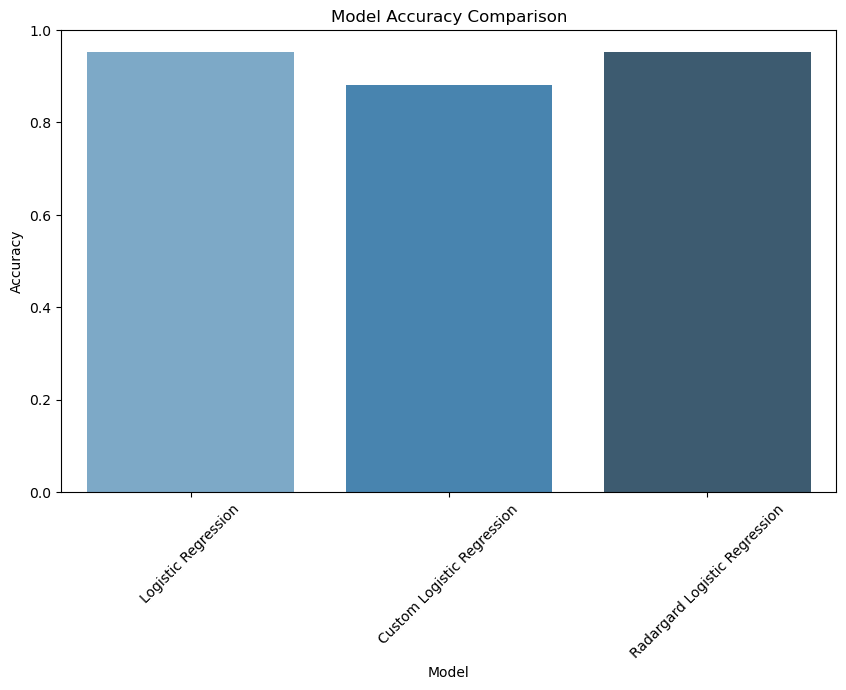

In [268]:
models = ['Logistic Regression', 'Custom Logistic Regression', 'Radargard Logistic Regression']
accuracies = [accuracy_rogistic, accuracy_rogistic_custom, accuracy_rogistic_Radargard]

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette="Blues_d")
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)  # Set y-axis limit from 0 to 1 for accuracy
plt.xticks(rotation=45)
plt.show()